## Case study  - Uber Data Analysis

You have the uber drive data for a driver which captures the differnet aspects of driving behavior. You are a part of the project where you need to grill this data and report the important findings from the grilling and drilling exercise. You also need to provide some useful insights about the trip behaviour of a Uber driver.
Let us try to dive into the data with pandas and numpy by our side!

#### Dataset - 
The dataset contains-
- Start Date - the date and time of the start of the trip
- End Date - the date and time of the end of the trip
- Start Location - staring location of the trip 
- End Location  - location where the trip ended
- Miles Driven  - Total miles driven between the start and the end of the trip
- Purpose of drive - Purpose of the trip (Business, Personal, Meals, Errands, Meetings, Customer Support etc.)

----------------------
- Concepts To cover 
----------------------
- 1. <a href = #link1>Overview of the data at hand</a>
- 2. <a href = #link3>Filtering Data</a> 
- 3. <a href = #link2>Data profiling and the functions offered by pandas for understanding the data</a>
- 4. <a href = #link4>DateTime operations</a> 




In [7]:
# !pip install pandas==1.0.5
!pip install pandas-profiling==2.8.0

  Using cached pandas_profiling-2.8.0-py2.py3-none-any.whl (259 kB)
  Using cached tqdm-4.48.2-py2.py3-none-any.whl (68 kB)
  Using cached matplotlib-3.3.1-1-cp37-cp37m-win_amd64.whl (8.9 MB)
  Using cached visions-0.4.4-py3-none-any.whl (59 kB)
  Using cached phik-0.10.0-py3-none-any.whl (599 kB)
  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached confuse-1.3.0-py2.py3-none-any.whl (64 kB)
  Using cached pandas-1.1.1-cp37-cp37m-win_amd64.whl (9.4 MB)
  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
Processing c:\users\jimmy\appdata\local\pip\cache\wheels\16\72\b0\e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe\imagehash-4.1.0-py2.py3-none-any.whl
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.42.1
    Uninstalling tqdm-4.42.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\tqdm-4.42.1.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



In [8]:
# Import the libraries 
import numpy as np
import pandas as pd

### <a id = "link1"></a>Overview of the data

In [9]:
# Read the Data 
df = pd.read_csv('uberdrive.csv')

#---------------------------Other options with read_csv()----------------------#
# df = pd.read_csv('../data/uberdrive.csv', skiprows = 100)  # To skip first n nows 
# df = pd.read_csv('../data/uberdrive.csv', nrows = 100)  # Load only the first n rows
# df = pd.read_csv('../data/uberdrive.csv', usecols = ['START_DATE*', 'END_DATE*'])  # Load only selected columns

In [10]:
# View first 3 rows of data 
df.head(3) 

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [11]:
#View the last 3 rows of data
df.tail(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [12]:
# understand shape and size of data 
print(df.shape)
print(df.size)

(1156, 7)
8092


In [13]:
# check info about data (includes column names, the number of non-null values in it, and data-type for each column.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [14]:
# Get the datatype for each column of dataframe.
df.dtypes                           

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [15]:
# get numerical overview of numerical type columns (MILES)
df.describe()         

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


### Understanding the missing data 

In [16]:
# Same as above, gives non-null number of records
df.count()

START_DATE*    1156
END_DATE*      1155
CATEGORY*      1155
START*         1155
STOP*          1155
MILES*         1156
PURPOSE*        653
dtype: int64

1. PURPOSE column has lots of missing values  
2. Some of the columns have a 1155 records while there are others with 1156, why is that? Lets explore

In [17]:
# Is any of the values in the df null?  (# Useful in writing validation scripts on large number of files )
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [18]:
# You can also find the columns with missing values through the snippet below
null_cols = df.columns[df.isnull().any()] # get only the columns that have a null value.
null_cols = list(null_cols)
print(null_cols)
# Get the columns into a list and do use it to do some operations

['END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'PURPOSE*']


In [19]:
# isnull() function checks the number of null values and sum() function sums up the count of these.
# Shows the column wise values of missing data
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Show the records with missing values for column= PURPOSE 

In [20]:
df[df['PURPOSE*'].isnull()].head(10)
# you can as well do a head() function on this to just view the first n rows

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
88,2/9/2016 13:58,2/9/2016 14:02,Personal,Preston,Whitebridge,1.5,NaN
89,2/9/2016 18:55,2/9/2016 19:11,Business,Cary,Morrisville,6.1,NaN
102,2/13/2016 23:45,2/14/2016 0:01,Personal,East Elmhurst,Jackson Heights,2.7,NaN
103,2/14/2016 0:50,2/14/2016 1:00,Personal,Jackson Heights,East Elmhurst,1.8,NaN
109,2/16/2016 8:29,2/16/2016 9:34,Business,Unknown Location,Colombo,14.1,NaN


How many records are non-null  / have values ( in a particular column )

In [21]:
df['PURPOSE*'].count()

653

In [22]:
df[df['END_DATE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [23]:
# the above record has no entry apart from the miles and can be discarded
df.drop(1155, inplace = True)  
# we set the inplace attribute to True so that the row is dropped and the dataframe is updated simultaneously.

In [25]:
df[df['END_DATE*'].isnull()], df.shape
# note that the row is now dropped

(Empty DataFrame
 Columns: [START_DATE*, END_DATE*, CATEGORY*, START*, STOP*, MILES*, PURPOSE*]
 Index: [],
 (1155, 7))

Note that while we dropped the row above, we will discuss in detail the techniques to handle the missing data in the upcomping weeks.

### Renaming columns

In [26]:
# Rename the columns to remove the * from the names
# Why ? we can use df.START_DATE same way as  df['START_DATE*']
col_names = ['START_DATE','END_DATE','CAT', 'START' , 'STOP' , 'MILES','PURPOSE']
df.columns = col_names


#or 
# Replace the * character from all the  columns .
# ( in case you have many columns and cant manually write the column names )
df.columns = df.columns.str.replace("*", "")

# You can also rename the specific column names 
df.rename( columns = {'CAT':'CATEGORY'})
df.head()

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### <a id = "link3"></a>Filtering dataframes
#### Using null values

In [27]:
# Operation 1
# shows the top 5 entries where PURPOSE is null
df[df.PURPOSE.isnull()].head(5)

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN


In [28]:
# Operation 2
# Here we have the rows that have atleast one null value. Note that since only PURPOSE column has the null value,
# We will get all the records where purpose is null
df[df.isnull().any(axis = 1)].head(5)

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN


In [29]:
# Operation 3
# inverting the selection ( not null ) ( works for booleans cases)
# using the ~, we invert the selection done in the above methods. 
# Here only the records where the purpose is not null will show up.
df[~df.PURPOSE.isnull()]

# you can also invert the operation 2 above

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site



#### Filtering out records based on conditions

In [30]:
#1. Conditions within dataframe 
df[df['MILES'] > 30].head()

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
36,1/20/2016 13:25,1/20/2016 14:19,Business,Raleigh,Cary,40.2,Customer Visit
108,2/16/2016 3:21,2/16/2016 4:13,Business,Katunayaka,Unknown Location,43.7,Customer Visit
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
233,3/17/2016 15:16,3/17/2016 15:58,Business,Katy,Houston,30.2,Meeting


In [31]:
#2. SQL-like query
df.query('MILES > 30').head(5)

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
36,1/20/2016 13:25,1/20/2016 14:19,Business,Raleigh,Cary,40.2,Customer Visit
108,2/16/2016 3:21,2/16/2016 4:13,Business,Katunayaka,Unknown Location,43.7,Customer Visit
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
233,3/17/2016 15:16,3/17/2016 15:58,Business,Katy,Houston,30.2,Meeting


### Exploring Columns

#### Explore the details from the MILES column


In [32]:
print(df.MILES.max())
print(df[df.MILES == df.MILES.max()])                               # Show the row that has the max miles 
print(df.MILES.sort_values(ascending=False).head(10))               # Show the top 10 rides (in terms of distance driven)
print(df.sort_values(by='MILES' , ascending=False).head(10))        # Shows the top 10 rows of MILES (decreasing value)

310.3
          START_DATE         END_DATE       CAT  START          STOP  MILES  \
269  3/25/2016 16:52  3/25/2016 22:22  Business  Latta  Jacksonville  310.3   

            PURPOSE  
269  Customer Visit  
269    310.3
270    201.0
881    195.9
776    195.6
546    195.3
559    180.2
297    174.2
299    159.3
727    156.9
298    144.0
Name: MILES, dtype: float64
           START_DATE          END_DATE       CAT             START  \
269   3/25/2016 16:52   3/25/2016 22:22  Business             Latta   
270   3/25/2016 22:54    3/26/2016 1:39  Business      Jacksonville   
881  10/30/2016 15:22  10/30/2016 18:23  Business         Asheville   
776   9/27/2016 21:01    9/28/2016 2:37  Business  Unknown Location   
546   7/14/2016 16:39   7/14/2016 20:05  Business       Morrisville   
559   7/17/2016 12:20   7/17/2016 15:25  Personal             Boone   
297    4/2/2016 19:38    4/2/2016 22:36  Business      Jacksonville   
299     4/3/2016 2:00     4/3/2016 4:16  Business          Floren

In [33]:
len(df)                             # Get the number of rows of dataframe.

1155

#### Dropping rows  which have null values

In [34]:
# Get the initial data with dropping the NA values
df_dropped = df.dropna()  
# Dont do the above step (df.dropna()) on the original dataframe, because you will lose good rows with values.
# To avoid losing good rows with values, make a copy and do operations on that.

In [35]:
df_dropped.shape          # Get the shape of the dataframe after removing the null values

(653, 7)

The filtered dataset with no nulls ( in PURPOSE column )  contains 653 rows of non-null values

## <a id = "link2"></a>Lets explore the data parameter wise - 

- 1.Destination - (starting and stopping)

- 2.Time - (hour of the day, day of week, month of year)

- 3.Grouping two parameters to get more insights

- 4.Category and Purpose

## 1. Destination
### Understanding  the start and stop points 
###### We will explore the feature through the points below - 
- Name and number of all the unique start and stop points
- find stations that are both in the stop and start points
- Popular start and stop points
- Rides with same start and stop points
- Starting point from which most miles have been driven
- Start- stop pairs that are most travelled in terms of distance and number of trips

Also, we will have a peek into one of the visualisation techniques that we are going to learn in the upcoming week


In [53]:
# Get the unique starting point, unique destination
# names of unique start points
print(df['START'].unique())

['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Whitebridge' 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Tanglewood' 'Preston' 'Eastgate'
 'East Elmhurst' 'Jackson Heights' 'Long Island City' 'Katunayaka'
 'Unknown Location' 'Colombo' 'Nugegoda' 'Islamabad' 'R?walpindi'
 'Noorpur Shahan' 'Heritage Pines' 'Westpark Place' 'Waverly Place'
 'Wayne Ridge' 'Weston' 'East Austin' 'West University' 'South Congress'
 'The Drag' 'Congress Ave District' 'Red River District' 'Georgian Acres'
 'North Austin' 'Coxville' 'Convention Center District' 'Austin' 'Katy'
 'Sharpstown' 'Sugar Land' 'Galveston' 'Port Bolivar' 'Washington Avenue'
 'Briar Meadow' 'Latta' 'Jacksonville'

In [54]:
len(df['START'].unique())                              # Count of unique start points using  len()

177

In [55]:
print(df['START'].nunique())                           # or use can use the nunique function

177


In [56]:
# Get the names of stopping destinations, unique destinations
# Names of unique stopping points
print(df['STOP'].unique())

['Fort Pierce' 'West Palm Beach' 'Palm Beach' 'Cary' 'Morrisville'
 'New York' 'Queens' 'East Harlem' 'NoMad' 'Midtown' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Queens County'
 'Gulfton' 'Downtown' 'Houston' 'Jamestown Court' 'Durham' 'Whitebridge'
 'Lake Wellingborough' 'Raleigh' 'Umstead' 'Hazelwood' 'Westpark Place'
 'Meredith Townes' 'Leesville Hollow' 'Apex' 'Chapel Hill'
 'Williamsburg Manor' 'Macgregor Downs' 'Edgehill Farms' 'Northwoods'
 'Tanglewood' 'Preston' 'Walnut Terrace' 'Jackson Heights' 'East Elmhurst'
 'Midtown West' 'Long Island City' 'Jamaica' 'Unknown Location' 'Colombo'
 'Nugegoda' 'Katunayaka' 'Islamabad' 'R?walpindi' 'Noorpur Shahan'
 'Heritage Pines' 'Waverly Place' 'Wayne Ridge' 'Depot Historic District'
 'Weston' 'West University' 'South Congress' 'Arts District'
 'Congress Ave District' 'Red River District' 'The Drag'
 'Convention Center District' 'North Austin' 'Coxville' 'Katy' 'Alief'
 'Sharpstown' 'Sugar Land' 'Galveston' 'Port

In [57]:
print(len(df['STOP'].unique()))            # count of unique stopping points

188


#### Bonus: Using set

In [58]:
# To take it one level up in the ease of comparing between two series/lists , use sets
# Find details comparing (between) unique start and stop locations 

s_start = set(df['START'])                 # names of unique start points
s_stop = set(df['STOP'])                   # names of unique stop points

print(len(s_start))
print(len(s_stop))

177
188


In [59]:
#Example on how to use sets to do intersection , union and difference

l1 = [1,2,3,4,4]
l2 = [3,4,5,6]

s1 = set(l1)
s2 = set(l2)

print(s2 - s1) # difference  (whats in l2 and not in l1)
print(s1 - s2) # difference (whats in l1 and not in l2)
print(s2 | s1) # union 
print(s2 & s1) # intersection

{5, 6}
{1, 2}
{1, 2, 3, 4, 5, 6}
{3, 4}


#### Stations which appear in both the start and the stop locations

In [60]:
s_stop & s_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Convention Center District',
 'Cory',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagle Rock',
 'East Elmhurst',
 'East Harlem',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Emeryville',
 'Farmington Woods',
 'Financial District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hudson Square',
 'Huntington Woods',
 'Ingleside',
 'Islamabad',
 'Jackson Heights',
 'Jacksonville',
 'Jamaica',
 'Jamestown Court',
 'K Street',
 'Kalorama Triangle',
 'Kar?chi',
 'Karac

In [61]:
#Identify popular start points - top 10
df['START'].value_counts().head(10)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START, dtype: int64

In [62]:
#Identify popular stop destinations - top 10
df['STOP'].value_counts().head(10)

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64

In [63]:
# Are there cases where the start and the stop location are the same  ? 
df[df['START'] == df['STOP']]

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk,weekday,cal_month
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,1,21,1,4,Fri,Jan
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,2016-01-02 01:37:00,2,1,1,5,Sat,Jan
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,2,20,1,5,Sat,Jan
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,5,17,1,1,Tue,Jan
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00,6,17,1,2,Wed,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies,2016-12-30 15:41:00,2016-12-30 16:03:00,30,15,12,4,Fri,Dec
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting,2016-12-30 16:45:00,2016-12-30 17:08:00,30,16,12,4,Fri,Dec
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit,2016-12-30 23:06:00,2016-12-30 23:10:00,30,23,12,4,Fri,Dec
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31 01:07:00,2016-12-31 01:14:00,31,1,12,5,Sat,Dec


Favorite starting point w.r.t. the total miles covered.

In [64]:
df.groupby('START')['MILES'].sum().sort_values(ascending = False ).head(10)

START
Unknown Location    1976.5
Cary                1791.3
Morrisville          671.7
Raleigh              433.0
Islamabad            401.2
Durham               384.4
Jacksonville         375.2
Latta                310.3
Asheville            287.7
Whitebridge          273.4
Name: MILES, dtype: float64

Find the top10 start stop pair that have the most miles covered between them ever.

In [65]:
# Let us drop the unknown locations
df2 = df[df['START'] != 'Unknown Location']             # Makes a new dataframe, which don't have "Unknown Location" as starting point
df2 = df2[df2['STOP'] != 'Unknown Location']            # Further updates the df2 dataframe, by removing "Unknown Location" as stopping point

In [66]:
# Creating a dataframe with the top 10 most miles covered between a start stop pair

k3 = df2.groupby(['START','STOP'])['MILES'].sum().sort_values(ascending=False).head(10) 
k3= k3.reset_index() # flatten the dataframe 
k3['Start-Stop'] = k3['START'] + ' - ' + k3['STOP']
k3 = df2.groupby(['START','STOP'])['MILES'].sum().sort_values(ascending=False).head(10) 
k3= k3.reset_index() # flatten the dataframe 
k3['Start-Stop'] = k3['START'] + ' - ' + k3['STOP']
k3

,START,STOP,MILES,Start-Stop
0,Morrisville,Cary,395.7,Morrisville - Cary
1,Cary,Durham,390.0,Cary - Durham
2,Cary,Morrisville,380.0,Cary - Morrisville
3,Raleigh,Cary,365.7,Raleigh - Cary
4,Cary,Raleigh,336.5,Cary - Raleigh
5,Durham,Cary,334.4,Durham - Cary
6,Latta,Jacksonville,310.3,Latta - Jacksonville
7,Cary,Cary,255.9,Cary - Cary
8,Jacksonville,Kissimmee,201.0,Jacksonville - Kissimmee
9,Asheville,Mebane,195.9,Asheville - Mebane


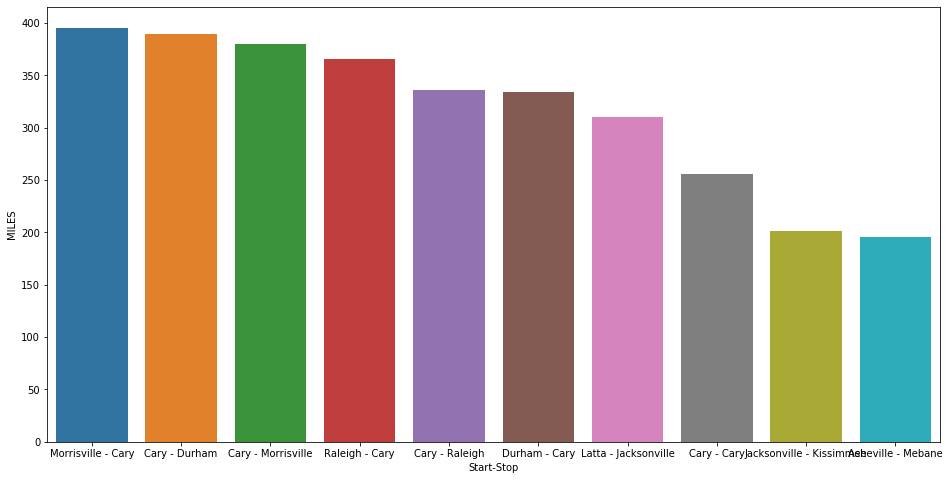

In [67]:
# just a peek into the visualisation module which you are going to learn in the upcoming weeek. 
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.barplot(data= k3 , x= 'Start-Stop' , y ='MILES')

The most popular start and stop pair - ( BY COUNT of travels! )

In [68]:
df2.groupby(['START','STOP'])['MILES'].size().sort_values(ascending=False).head(10)

START        STOP       
Morrisville  Cary           75
Cary         Morrisville    67
             Cary           53
             Durham         36
Durham       Cary           32
Lahore       Lahore         27
Islamabad    Islamabad      25
Cary         Raleigh        23
Raleigh      Cary           21
Kar?chi      Kar?chi        20
Name: MILES, dtype: int64

**The most popular start to destination pair is Morrisville-Cary**

<a id = "link4"></a>
## 2. Start Date - End Date 
### Manipulating date & time objects
#### Lets explore the variables using the below points-
- create new start_date and end_date column by converting them into datetime objects
- create columns for day, hour, month and the day of the week
- busiest month in terms of number of drives and miles driven
- busiest day of the week and preferred start hour 
- peak hours
- create features for trip duration data 

In [69]:
df.head(3)

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk,weekday,cal_month
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,1,21,1,4,Fri,Jan
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,2016-01-02 01:37:00,2,1,1,5,Sat,Jan
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,2,20,1,5,Sat,Jan


We will be using the datetime module (  https://docs.python.org/3/library/datetime.html  )

Search for "strftime() and strptime() Format Codes" in the documentation page

In [70]:
df.dtypes

START_DATE             object
END_DATE               object
CAT                    object
START                  object
STOP                   object
MILES                 float64
PURPOSE                object
start_dt       datetime64[ns]
end_dt         datetime64[ns]
start_day               int64
start_hour              int64
start_month             int64
d_of_wk                 int64
weekday                object
cal_month              object
dtype: object

In [71]:
# Create columns by converting the start and end date into a datatime format
# You can also over write the same column - but for the sake of understanding the difference in formats, we create new columns

from datetime import datetime                             # Import datetime library
df['start_dt'] = df['START_DATE'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))
df['end_dt'] = df['END_DATE'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))

In [72]:
df.head()             # Print first 5 rows of data.

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk,weekday,cal_month
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,1,21,1,4,Fri,Jan
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,2016-01-02 01:37:00,2,1,1,5,Sat,Jan
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,2,20,1,5,Sat,Jan
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,5,17,1,1,Tue,Jan
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,6,14,1,2,Wed,Jan


In [46]:
df.dtypes             # See how the dtype is different

START_DATE            object
END_DATE              object
CAT                   object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
start_dt      datetime64[ns]
end_dt        datetime64[ns]
dtype: object

In [47]:
#Create more columns by using the inbuilt functionalities of datatime module

df['start_day'] = df['start_dt'].dt.day
df['start_hour'] = df['start_dt'].dt.hour
df['start_month'] = df['start_dt'].dt.month
df['d_of_wk'] = df['start_dt'].dt.dayofweek   # Days encoded as 0-6  ( monday =0, Tue =1 .... )

In [48]:
# You can convert the numeric encoding of weekdays into short form by manually writing the mapping 
# days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
# df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

#or use the builtin functions 

df['weekday'] = df['start_dt'].apply(lambda x : datetime.strftime(x,'%a'))  # ( or directly convert into the short form)

In [49]:
# Similarly you can use the calendar library to get the month abbreviation 

#import calendar
#df['start_month_cal'] = df['start_month'].apply(lambda x: calendar.month_abbr[x])

# or 
# use the built in functions in datatime module
df['cal_month'] =  df['start_dt'].apply(lambda x : datetime.strftime(x,'%b'))

In [50]:
df.head()

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk,weekday,cal_month
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,1,21,1,4,Fri,Jan
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,2016-01-02 01:37:00,2,1,1,5,Sat,Jan
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,2,20,1,5,Sat,Jan
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,5,17,1,1,Tue,Jan
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,6,14,1,2,Wed,Jan


In [51]:
# Which month did he get most drives? 
df.groupby(['start_month']).size()             # Group by the month

start_month
1      61
2     115
3     113
4      54
5      49
6     108
7     112
8     133
9      36
10    106
11    122
12    146
dtype: int64

In [52]:
df.groupby('cal_month').sum()['MILES'].sort_values(ascending = False)           

cal_month
Oct    1810.0
Mar    1693.9
Aug    1335.5
Jul    1224.6
Apr    1113.0
Dec     981.3
Feb     908.2
Jun     842.8
Nov     816.9
Sep     601.8
Jan     512.9
May     363.8
Name: MILES, dtype: float64

In [ ]:
# Getting the average distance covered each month
df.groupby('cal_month').mean()['MILES'].sort_values(ascending = False)

In [ ]:
# Write your inferences here based on the last 3 outputs 

In [ ]:
# Which day did he get most drives? 
df.groupby(['weekday']).size()  

**When does he usually start the trip ?**

In [ ]:
df.groupby('start_hour').size()              # The number of trips started for each hour.

This looks like an interesting data 

Does he have a prefered time of start ?

In [ ]:
df['start_hour'] = df['start_dt'].dt.hour

In [ ]:
df_hrs = df.groupby('start_hour').size()
df_hrs = df_hrs.reset_index()
df_hrs.columns = ['start_hour' ,'count']
sns.barplot(data= df_hrs , x ='start_hour' , y = 'count')

Looks like the driver mostly starts the trip around 9-10 and the peak hours seem to be between 12- 5 PM 

Duration of the trips 

In [ ]:
df['diff'] = (df['end_dt'] - df['start_dt'])

In [ ]:
df.dtypes

This creates a timedelta datatype

How long did the trips last 

In [ ]:
df['diff_hr'] = df['diff'].astype('timedelta64[h]')

Find the date time units in  https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

search for 'Datetime Units'

In [ ]:
df['diff'].describe()

In [ ]:
# View in terms of minutes 
df['diff_mins'] = df['diff'].astype('timedelta64[m]')

In [ ]:
df['diff_mins'].describe()

There seems to be somethin strange with the minumum time ( in minutes ) - it is 0 

In [ ]:
len(df[df['START_DATE'] == df['END_DATE']])

df[df['START_DATE'] == df['END_DATE']]

There are some values where the start and end times are the same - remove them ?

In [ ]:
len(df2)

## 3. Exploring existing features to create new ones - Speed 
- Open for all of you to explore and figure out what all can be understood and derived from this feature

In [ ]:
# calculate trip speed for each trip
df['Duration_hours'] = df['diff_mins'] / 60
df['Speed'] = df['MILES'] / df['Duration_hours']
df['Speed'].describe()

Remove the ones with unknown location

In [ ]:
# Remove the ones that have the same start and end time (and redo the analysis)
df2 = df[df.start_dt != df.end_dt]

# we still see some really fast driving !!
df2.sort_values(by ='diff_mins', ascending = True).head(5)

# To do 
# Take a cut off for the time taken to drive to  do the speed analysis again 
# something like (df.diff_mins > 5)
# analyse only the trips that lasted atleast 5 mins 

## 4. Category & Purpose
#### Explore the category and the purpose of the trips through
- Most frequent business category
- Most frequent trip purpose
- Miles driven per category and purpose
- Percent composition of business miles vs personal miles
- time spent per category and purpose

In [ ]:
df['CAT'].value_counts()

**Most trips are in the business category**

In [ ]:
#Purpose
df['PURPOSE'].value_counts()

**Most trips are for meetings**

In [ ]:
#Average distance traveled for each activity
df.groupby('PURPOSE').mean()['MILES'].sort_values(ascending = False)

Now lets try to answer some questions from this data.

Question1: How many miles was earned per category and purpose ?

Question2: What is percentage of business miles vs personal?

Question3: How much time was spend for drives per category and purpose? 


In [ ]:
#Question1: How many miles was earned per category and purpose ?
df.groupby('PURPOSE').sum()['MILES'].sort_values(ascending = False)

In [ ]:
#Question1: How many miles was earned per category and purpose ?
df.groupby('CAT').sum()['MILES'].sort_values(ascending = False)

In [ ]:
#Question2: What is percentage of business miles vs personal?
df1 = df.groupby('CAT').agg({'MILES':'sum'})
df1
df1.apply(lambda x: x/x.sum()*100).rename(columns = {'MILES':'% of Miles'})

In [ ]:
#Question3: How much time was spend for drives per category and purpose?
dfk= df.groupby('CAT').sum()['diff_mins'].sort_values(ascending = False)
dfk.apply(lambda x: x/60)

In [ ]:
#Question3: How much time was spend for drives per category and purpose? 
df.groupby('PURPOSE').sum()['diff_mins'].sort_values(ascending = False)

## Summary  -
Through this exercise, we tried to check out the data analysis toolkit offered by pandas. We went to explore variables at hand, use groupby, implement datatime manipulation, create new features and various other operations on pandas dataframe.
We also had a sneak peek into the upcoming week's topic of visualization.

Learners are recommended to explore further on this building on the points discussed in the notebook.
Happy Learning!